In [1]:
!pip install -q deep_autoviml

     |████████████████████████████████| 269 kB 6.5 MB/s 
     |████████████████████████████████| 308 kB 30.0 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 170 kB 65.4 MB/s 
     |████████████████████████████████| 4.4 MB 47.8 MB/s 
     |████████████████████████████████| 14.5 MB 34 kB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 209 kB 65.2 MB/s 
     |████████████████████████████████| 75 kB 5.2 MB/s 
     |████████████████████████████████| 144 kB 87.7 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 111 kB 63.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
!ls '/content/gdrive/My Drive/SEM4/297DL/hw4/data/nlp'

NLP_small.csv


In [6]:
# download dataset from Kaggle: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv

datapath = '/content/gdrive/My Drive/SEM4/297DL/hw4/data/nlp/'
sep = ','
filename = 'NLP_small.csv'
df = pd.read_csv(datapath+filename,sep=sep)
target = 'Sentiment'
print(df.shape)
df.head(1)

(498, 4)


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2


In [7]:
df[target].value_counts()

2    305
3    158
1     35
Name: Sentiment, dtype: int64

In [8]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 50, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = datapath+filename

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 50
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
Loaded a small data sample of size = (498, 4) into pandas dataframe to analyze...
    Classifying

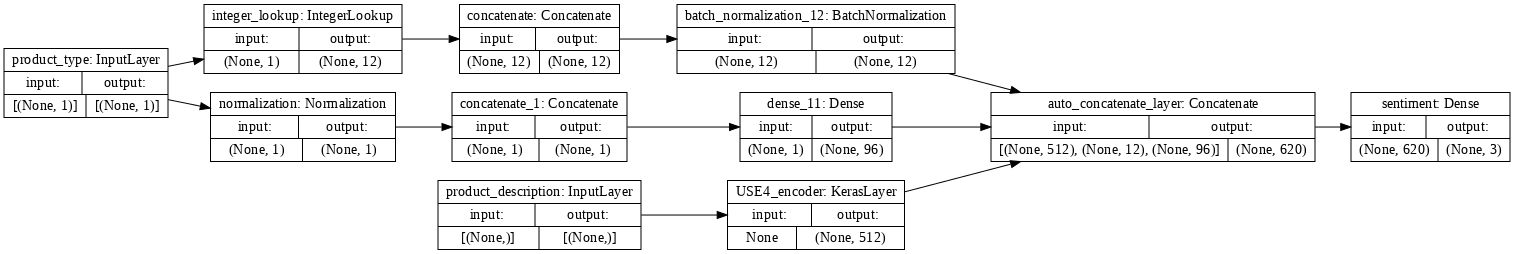

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 4.742857142857143, 1: 1.0, 2: 1.0506329113924051}
    original datasize = 508, initial batchsize = 32
    recommended steps per epoch = 10
    recommended OneCycle steps = 800
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 50, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting va

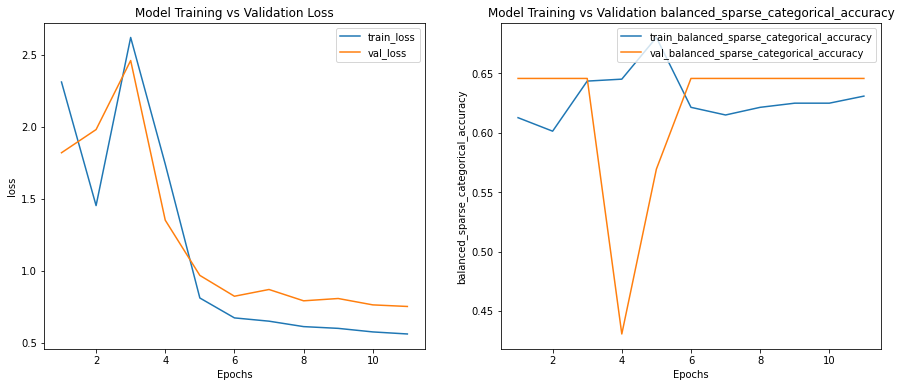


###########################################################
         Held-out test data set Results:
Single Label (single-output), Multi-Class Report: Sentiment
#################################################################


    Accuracy          = 85.9%
    Balanced Accuracy (average recall) = 64.7%
    Average Precision (macro) = 55.6%
    Precisions by class:
    90.7%      0.0%      76.2%  
    Recall Scores by class:
    100.0%      0.0%      94.1%  
    F1 Scores by class:
    95.1%      0.0%      84.2%  
#####################################################

Training on full train dataset for 1 epochs. This will take time...
    completed. Time taken (in mins) = 0


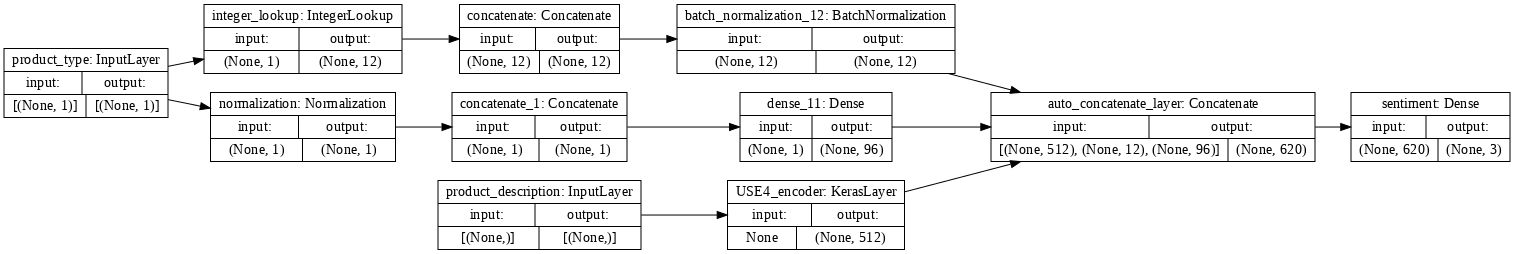

Model plot saved in file: deep_autoviml_churn_1_USE_model_after.png


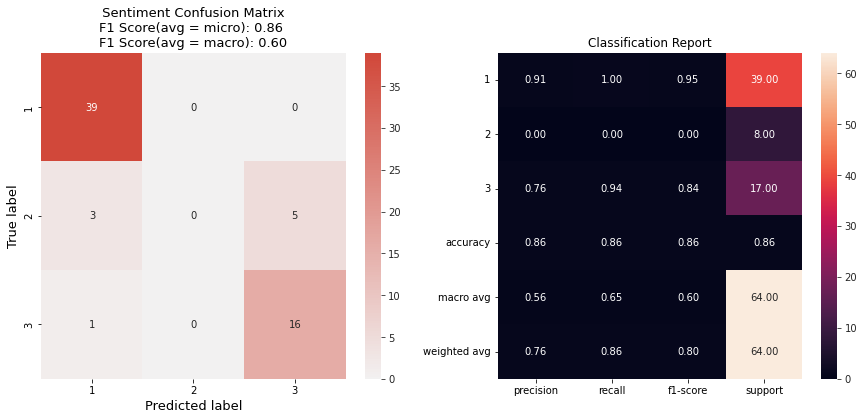

In [9]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                            save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [10]:
filename = 'NLP_small.csv'
testfile = datapath+filename

In [11]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7fae9bc3a190> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7fae9bc3a190> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 498
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    4 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in datatset:
    number of binary = 0, cats

In [12]:
test = pd.read_csv(testfile)
predictions[0][:5]

array([[0.993, 0.003, 0.004],
       [0.992, 0.003, 0.005],
       [0.993, 0.003, 0.004],
       [0.992, 0.004, 0.005],
       [0.992, 0.003, 0.005]], dtype=float32)

In [13]:
predictions[1][:5]

array([1, 1, 1, 1, 1])

In [14]:
test[target].values[:5]

array([2, 2, 2, 2, 2])